# ¡Llena ese carrito!

## Introducción
---

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos
---

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

## Paso 1. Descripción de los datos
---

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


### 1.1 Plan de solución

1. Importación de ambiente y datos
   1. Importación de bibliotecas
   2. Carga de datos
   3. Inspección de los df


### 1.2 Importación del ambiente y datos
Primero, importamos las bibliotecas necesarias para el análisis de datos, las cuales incluyen: pandas, numpy y matplotlib. 

In [106]:
# Importación librerías a utilizar
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Posteriormente cargamos los archivos CSV que contienen los datos del proyecto y verificamos como es que se visualizan. 

In [107]:
# Importación de datos
## Pasillos 
aisles = pd.read_csv("../data/aisles.csv", sep= ";")

## Departamentos
departments = pd.read_csv("../data/departments.csv", sep= ";")

## Ordenes instacart
insta_orders = pd.read_csv("../data/instacart_orders.csv", sep= ";")

## Ordenes porductos
order_products = pd.read_csv("../data/order_products.csv", sep= ";")

## Productos instacart 
products = pd.read_csv("../data/products.csv", sep = ";")


In [108]:
# Mostrar información del DataFrame
aisles.info(show_counts= True)
print()
print(aisles.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [109]:
# mostrar información del DataFrame
departments.info(show_counts= True)
print()
print(departments.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [110]:
# mostrar información del DataFrame
insta_orders.info(show_counts= True)
print()
insta_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [111]:
# mostrar información del DataFrame
order_products.info(show_counts= True)
print()
order_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB



,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [112]:
# mostrar información del DataFrame
products.info(show_counts= True)
print()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB



,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


### 1.3 Conclusión

Durante la importación de librerías y la carga de los archivos de datos, se identificaron varios aspectos que requieren atención para proceder con el análisis de datos de manera efectiva:

1. **Separador de Archivos**: Todos los archivos CSV utilizados en este análisis tenían un separador de tipo ;, lo cual fue identificado y corregido durante la carga de los datos utilizando el argumento adecuado en la función pd.read_csv().

2. **Observaciones de los DataFrames Cargados**:
   - `aisles`: 2 columnas, 134 observaciones. Completo. 
   - `departments`: 2 columnas, 21 observaciones. Completo.
   - `insta_orders`: 6 columnas, 478,967 observaciones. Datos faltantes en `days_since_prior_order`.
   - `order_products`: 4 columnas, 4,545,007 observaciones. Datos faltantes en `add_to_cart_order`.
   - `products`: 4 columnas, 49,694 observaciones. Datos faltantes en `product_name`.

3. **Manipulación de datos**. Cada DataFrame, a excepción de los dos primeros, requiere diferentes niveles de manipulación y limpieza para preparar los datos adecuadamente para los análisis posteriores.

Notamos que existen columnas referenciadas entre los distintos dataframes que pueden ser de utilidad más adelante. 

## Paso 2. Preprocesamiento de los datos
---

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

### 2.1 Plan de solución

Para el paso 2 se realizará la limpieza de datos
2. Limpieza de datos
   1. Verificación y manipulación de tipo de datos
   2. Identifica y completa los valores ausentes.
   3. Verificación de datos duplicados


### 2.2 Manipulación de datos
Con respectoi a la manipulación de datos:
- Df `aisles`: Dado que cada dato en la columna `aisle` es único, no es necesario categorizar esta variable.
- Df `departments`: Similar al DataFrame `aisles`, la variable `department` no requiere categorización, ya que cada dato es único.
- Df `instacart_orders`: Se convierte el formato numérico de los días a nombres de días de la semana para mejorar la comprensión.
- Df `order_products`: Se ha convierte el valor binario en la columna `reordered` en palabras para mejorar la comprensión.
- Df `products`: La categorización de la variable `product_name` se pospondrá hasta después de realizar la limpieza de duplicados.

In [113]:
# Manipulación df insta_order

## Conversión de día de pedido numérico a día 
### Creación función para convertir números en días
def num_to_day(num):
    if num == 0: 
        return "domingo"
    elif num == 1: 
        return "lunes"
    elif num== 2:
        return "martes"
    elif num== 3:
        return "miercoles"
    elif num== 4:
        return "jueves"
    elif num== 5:
        return "viernes"
    elif num== 6:
        return "sabado"
    
### Transformación de la variable numérica a días
insta_orders["order_days"] =insta_orders["order_dow"].apply(num_to_day) 

In [114]:
# Manipulación de df order_products
## Conversión reorden del producto numérico a palabras
order_products["reordered_wd"]= order_products["reordered"].replace({0: 'No', 1: 'Si'})

### 2.3 Identificación y eliminación de valores duplicados

#### Dataframe `insta_orders`

In [115]:
# Revisa si hay pedidos duplicados
## Número de duplicados antes de eliminar
num_duplicados = insta_orders.duplicated().sum()
print(f"Número de duplicados antes de eliminar: {num_duplicados}")
print(f"Número de filas antes de eliminar duplicados: {insta_orders.shape[0]}")
print()

## Identificación de duplicados exactos
insta_orders_duplicated = insta_orders[insta_orders.duplicated()]
print(insta_orders_duplicated)


Número de duplicados antes de eliminar: 15
Número de filas antes de eliminar duplicados: 478967

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189  

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?     
**R**: Si, el dataframe tiene 15 duplicados explícitos. 

In [116]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
insta_orders_duplicated[(insta_orders_duplicated["order_days"]== "miercoles") & (insta_orders_duplicated["order_hour_of_day"]==2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_days
145574,794638,50898,24,3,2,2.0,miercoles
223105,2160484,107525,16,3,2,30.0,miercoles
230807,1918001,188546,14,3,2,16.0,miercoles
266232,1782114,106752,1,3,2,NaN,miercoles
273805,1112182,202304,84,3,2,6.0,miercoles
284038,2845099,31189,11,3,2,7.0,miercoles
311713,1021560,53767,3,3,2,9.0,miercoles
321100,408114,68324,4,3,2,18.0,miercoles
323900,1919531,191501,32,3,2,7.0,miercoles
345917,2232988,82565,1,3,2,NaN,miercoles


¿Qué sugiere este resultado?  
**R**: El resultado de los 15 valores duplicados y después el filtro para ver si existen patrones me sugiere un posible fallo en el sistema que duplicó esas entradas más allá de un error ocaisonado por metar los datos, ya que al observar una hora y día en particular no observamos que exista un patrón en los datos. 

In [117]:
## Eliminación de duplicados exactos
insta_orders.drop_duplicates(inplace=True)
insta_orders.reset_index(drop=True)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_days
0,1515936,183418,11,6,13,30.0,sabado
1,1690866,163593,5,5,12,9.0,viernes
2,1454967,39980,4,5,19,2.0,viernes
3,1768857,82516,56,0,20,10.0,domingo
4,3007858,196724,2,4,12,17.0,jueves
...,...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0,lunes
478948,3270802,112087,2,3,13,6.0,miercoles
478949,885349,82944,16,2,11,6.0,martes
478950,216274,4391,3,3,8,8.0,miercoles


In [118]:
## Corroboración después de eliminar duplicados
num_duplicados_despues = insta_orders.duplicated().sum()
print(f"Número de duplicados después de eliminar: {num_duplicados_despues}")
print(f"Número de filas después de eliminar duplicados: {insta_orders.shape[0]}")

Número de duplicados después de eliminar: 0
Número de filas después de eliminar duplicados: 478952


In [119]:
# Vuelve a verificar si hay IDs duplicados de pedidos
## Identificación de duplicados exactos
print(insta_orders[insta_orders.duplicated()])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order, order_days]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos  
**R**: La base de datos `insta_orders ` presentó 15 duplicados explícitos por lo que se realizó la eliminación de los mismos, ya que no comprometen la información del dataframe. Además, revisamos de manera exploratoria si existía algun patrón en los datos que fueran similares pero encontramos heterogeneidad en los datos, por lo que se descarta esa opción. Se cree que el problema fue más por parte del sistema que duplicó entradas. 

#### Dataframe `products`

In [120]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum())

0


In [121]:
# Verifica si hay IDs duplicadas de productos
print(products["product_id"].duplicated().sum())

0


In [122]:
# Revisa si hay nombres duplicados de productos
## Número de duplicados
print(products["product_name"].duplicated().sum())

## Identificación de los duplicados
products[products["product_name"].duplicated()]

1257


,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [123]:
# Inspección de pasillo 100 y departamento 21
print(aisles[aisles['aisle_id'] == 100])
print()
print(departments[departments["department_id"]==21])


    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


In [124]:
# Revisa si hay nombres duplicados de productos no faltantes
## Creeación de dataframe sin valores perdidos
products_no_100 = products[(products["aisle_id"]!=100) & (products["department_id"] != 100)]
print(products_no_100.duplicated().sum())

## Inspección del dataframe sin valores perdidos
products_no_100["product_name"].sort_values(ascending=True).head(15)

0


25772                                  #2 Coffee Filters
2157                        #2 Cone White Coffee Filters
26684                              #2 Mechanical Pencils
26380                    #4 Natural Brown Coffee Filters
20603             & Go! Hazelnut Spread + Pretzel Sticks
27511                           'Swingtop' Premium Lager
40775      (70% Juice!) Mountain Raspberry Juice Squeeze
11907       +Energy Black Cherry Vegetable & Fruit Juice
29881                               .5\" Waterproof Tape
14772            0 Calorie Acai Raspberry Water Beverage
25420           0 Calorie Fuji Apple Pear Water Beverage
22964    0 Calorie Strawberry Dragonfruit Water Beverage
7493                  0% Fat Black Cherry Greek Yogurt y
3755                       0% Fat Blueberry Greek Yogurt
49516                           0% Fat Free Organic Milk
Name: product_name, dtype: object

In [125]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
## Conversión a mayúsculas
products_no_100.loc[:, "product_name"] = products_no_100["product_name"].str.upper()

## Número de duplicados
print(products_no_100["product_name"].duplicated().sum())

## Identificación de los duplicados
products_no_100[products_no_100["product_name"].duplicated()]

104


,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos.  
**R**: En la base de datos products, inicialmente no se encontraron duplicados explícitos. Sin embargo, durante la exploración del DataFrame, identificamos dos principales problemas:

1. Valores faltantes en la columna `product_name`.
2. Inconsistencias en la escritura de los nombres de productos.

Primero, inspeccionamos la columna `product_name` y notamos un patrón: todos los nombres de productos asociados con el pasillo 100 y el departamento 21 estaban ausentes. Al verificar en los DataFrames correspondientes, confirmamos que estos valores están catalogados como faltantes.

Luego, para abordar el segundo problema, realizamos un análisis más detallado de los nombres de productos. Debido a la posibilidad de duplicados implícitos por diferencias en la escritura, convertimos todos los nombres a mayúsculas para normalizar el formato. Tras este ajuste, detectamos 104 duplicados implícitos.

Con esta información, es necesario consultar con el supervisor para determinar cómo proceder con el tratamiento de estos duplicados implícitos. En este momento se convierten a mayúsculas todos los nombres del producto. 

In [126]:
## Conversión del nombre de productos a upper
products["product_name"] = products["product_name"].str.upper()

## Corroboración
products.sample(10)

,product_id,product_name,aisle_id,department_id
161,162,ORGANIC MINI HOMESTYLE WAFFLES,52,1
13454,13455,THAI SPICY MOCHI RICE CRACKER,66,6
4897,4898,VITAMIN C 250 MG 60 GUMMIES,47,11
46217,46218,BROWN 'N SERVE ORIGINAL FULLY COOKED SAUSAGE P...,52,1
24223,24224,PEPPER MULTISEED CRACKERS,78,19
37177,37178,HAWAIIAN KETTLE STYLE POTATO CHIPS SWEET MAUI ...,107,19
9503,9504,GLUTEN FREE MULITPACK BITE SIZE PEANUT BUTTER,78,19
19448,19449,FAT FREE VITAMIN A & D MILK,84,16
942,943,MAGNESIUM CITRATE CAPLETS,47,11
49093,49094,GRILLERS PATTIES CHEDDAR CHEESE & BACON,34,1


#### Dataframe `departments`

In [127]:
# Revisa si hay filas totalmente duplicadas
print(departments.duplicated().sum())

0


In [128]:
# Revisa si hay IDs duplicadas de productos
print(departments["department_id"].duplicated().sum())

0


In [129]:
# Inspección de nombre de departamentos
departments["department"].describe()

count         21
unique        21
top       frozen
freq           1
Name: department, dtype: object

Describe brevemente tus hallazgos y lo que hiciste con ellos.  
**R**: Al inspeccionar el DataFrame departments, observamos que tanto la columna `department_id` como la columna `department` tienen valores únicos. Es decir cada departamento tiene una id única. Por lo tanto, no es necesario realizar ninguna manipulación adicional en estas columnas.

#### Dataframe `aisles`

In [130]:
# Revisa si hay filas totalmente duplicadas
print(aisles.duplicated().sum())

0


In [131]:
# Revisa si hay IDs duplicadas de productos
print(aisles["aisle_id"].duplicated().sum())

0


In [132]:
aisles["aisle"].describe()

count                       134
unique                      134
top       prepared soups salads
freq                          1
Name: aisle, dtype: object

Describe brevemente tus hallazgos y lo que hiciste con ellos.   
**R**: Similar al Dataframe `departments`, el dataframe `aisles` contiene valores únicos. No requiere manipulación alguna.

#### Dataframe `order_products`

In [133]:
# Revisa si hay filas totalmente duplicadas
print(order_products.duplicated().sum())

0


In [134]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products[["order_id", "product_id"]].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.   
**R**: Al analizar el DataFrame `order_products`, encontramos que no hay duplicados exactos en el DataFrame. Sin embargo, para identificar posibles duplicados implícitos, entendemos que, un `product_id` puede aparecer varias veces si el producto se solicita en diferentes pedidos, y un `order_id` puede repetirse si una orden contiene múltiples productos. Por lo tanto, la combinación de `product_id` y `order_id` debe ser única para cada entrada. Al realizar el análisis de duplicados de acuerdo a lo anterior, notamos que no existen duplicados, confirmando que cada `order_id` está asociado con el `product_id` correspondiente de manera única. 

### 2.4 Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

#### Data frame `products`

In [135]:
# Encuentra los valores ausentes en la columna 'product_name'
products[products["product_name"].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.   
**R**: Como habiamos notado con anterioridad existen valores faltantes en el pasillo 100 y el departamento 21. 

In [136]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[(products["product_name"].isna()) & (products["aisle_id"] != 100)]

,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hallazgos.  
**R**. Afirmativo, todos los productos ausentes se relacionan con el pasillo con id 100. 

In [137]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[(products["product_name"].isna()) & (products["department_id"] != 21)]

,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hallazgos.   
**R**. Afirmativo, todos los productos ausentes se relacionan con el departamento con id 21. 

In [138]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
## Tabla ailes
print(aisles[aisles['aisle_id'] == 100])
print()

## Tabla departments
print(departments[departments["department_id"]==21])

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.   
**R**. Como habiamos indicado con anterioridad, los pasillos con id 100 y departamento con id 21 están catalogados como productos faltantes.

In [139]:
# Completa los nombres de productos ausentes con 'Unknown'
## Remplazo de NaNs 
products["product_name"] = products["product_name"].fillna("Unknown")

### Corroboración valores ausentes
print(products["product_name"].isna().sum())


0


Describe brevemente tus hallazgos y lo que hiciste con ellos.   
**R**. Los productos con nombres faltantes están asociados a un departamento y pasillo específicos. Sin embargo, es necesario rectificar la metadata con el supervisor para asegurar su precisión. Además, sería útil entender mejor el tipo de productos que se encuentran en esta sección. Por ahora, estos valores han sido etiquetados como `unknown`.

#### Dataframe `orders`

In [140]:
# Encuentra los valores ausentes
insta_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
order_days                    0
dtype: int64

In [141]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
## Filtramos para conocer los valores ausentes distintos a primera orden
insta_orders[(insta_orders["days_since_prior_order"].isna()) & (insta_orders["order_number"]!=1)]

## Determinamos el número de valores ausentes relacionados al primer pedido
days_missing = insta_orders[(insta_orders["days_since_prior_order"].isna()) & (insta_orders["order_number"]==1)]
days_missing.shape[0]

28817

Describe brevemente tus hallazgos y lo que hiciste con ellos.  
Observamos que la dataframe `insta_orders` contiene aproximadamente el 6% de valores ausentes, todos ellos se encuentran en la variable `days_since_prior_order`. Determinamos que 28817 valores faltantes en el dataframe se encuentra relacionado con la primer orden. Es necesario checar con el supervisor de qué manera se trabajará con esos valores ausentes, se momento se dejaron así. 

#### Dataframe `order_products`

In [142]:
# Encuentra los valores ausentes
## Determinamos donde se encuentran los valores ausentes
print(order_products.isna().sum())
print()

## Identificamos los valores ausentes
missing_cart_order = order_products[order_products["add_to_cart_order"].isna()]
print(missing_cart_order)


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
reordered_wd           0
dtype: int64

         order_id  product_id  add_to_cart_order  reordered reordered_wd
737       2449164        5068                NaN          0           No
9926      1968313       43867                NaN          0           No
14394     2926893       11688                NaN          0           No
16418     1717990        4142                NaN          0           No
30114     1959075       42828                NaN          1           Si
...           ...         ...                ...        ...          ...
4505662   1800005        7411                NaN          0           No
4511400   1633337         260                NaN          0           No
4517562    404157        9517                NaN          0           No
4534112   1673227       17835                NaN          0           No
4535739   1832957       17949                NaN          

In [143]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
## Identificamos los valores mínimos y máximos
print("Valor mínimo: ", order_products["add_to_cart_order"].min(), "\nValor máximo: ", order_products["add_to_cart_order"].max())

## Observamos el resumen de la variable
order_products["add_to_cart_order"].nunique()

Valor mínimo:  1.0 
Valor máximo:  64.0


64

Describe brevemente cuáles son tus hallazgos.  
**R**: De acuerdo con el dataframe de `order_products` observamos que existen 836 valores ausentes. Gracias a las pistas que tiene el proyecto vemos que solo existen 64 valores únicos, siendo el mínimo el 1 y el máximo 64, es decir no continuaron con el orden secuencial en el que se añadió a partir del artículo 65.

In [144]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_order_vector = missing_cart_order["order_id"]

In [145]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
## Filtrar del dataframe los order_id con pedidos ausentes
missing_orders = order_products.query("order_id in @missing_order_vector")

print(missing_orders)

         order_id  product_id  add_to_cart_order  reordered reordered_wd
267       2094761       31469               57.0          1           Si
737       2449164        5068                NaN          0           No
1742      2997021        4920               37.0          0           No
3463       871281       40063               61.0          1           Si
3535       171934       36397                7.0          0           No
...           ...         ...                ...        ...          ...
4543519   2621907       32018               28.0          1           Si
4544672    102236       34688               49.0          0           No
4544708   2256933       41544               21.0          0           No
4544771    180546       12741               46.0          1           Si
4544810   2136777       20072               10.0          0           No

[5316 rows x 5 columns]


In [146]:
## Agrupar todos los pedidos con datos ausentes por su ID de pedido.
missing_grouped_orders= missing_orders.groupby(by="order_id")["product_id"].count().sort_values(ascending=False)

## Contar el número de 'product_id' en cada pedido y revisar el valor mínimo del conteo.
print(missing_grouped_orders)
print()
print("Valor mínimo de conteo de paquetes", missing_grouped_orders.min())
print()

## Observar la distribución de los pedidos
print(missing_grouped_orders.value_counts())
print()
print("Total de ordenes ausentes: ", missing_grouped_orders.value_counts().sum())

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
888470      65
2170451     65
2729254     65
2621907     65
2652650     65
Name: product_id, Length: 70, dtype: int64

Valor mínimo de conteo de paquetes 65

product_id
65     9
70     6
67     6
69     6
66     5
73     4
74     3
71     3
86     3
95     2
78     2
77     2
76     2
75     2
68     2
92     2
91     2
115    1
87     1
108    1
104    1
98     1
127    1
85     1
80     1
72     1
Name: count, dtype: int64

Total de ordenes ausentes:  70


Describe brevemente cuáles son tus hallazgos.   
**R**: Hemos confirmado la hipótesis sobre la cantidad de productos en los pedidos con datos ausentes en la columna `add_to_cart_order`, siendo mayor a 65 productos.

In [147]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products["add_to_cart_order"] = order_products["add_to_cart_order"].fillna(999).astype("int")

Describe brevemente tus hallazgos y lo que hiciste con ellos.   
**R**:  Al agrupar los pedidos por su `order_id`, observamos que las ordenes con valores ausentes contienen mínimo 65 y máximo 127 productos. En total, identificamos 70 pedidos con esta característica, la mayoría de ellos tienen exactamente 65 productos, seguidos por otros con 67, 69 y 70 productos. Se ha determinado que todas aquellas ordenes con más de 65 productos tengan el valor de 999. Es importante **tener en cuenta** esrto al momento de realizar análisis posteriores. 

### 2.5 Conclusiones

Durante el paso del análisis de datos, que involucró el preprocesamiento de los datos, llevamos a cabo la limpieza de los diferentes dataframes con los que trabajamos. Las tareas realizadas incluyen la manipulación de datos, identificación y eliminación de valores duplicados, así como de valores ausentes. 

A manera de resumen se presentan los hallazgos y acciones principales: 

1. **Manipulación de datos**   
    Verificamos y ajustamos los tipos de datos opara asegurar el formato correcto. Por ejemplo, mejoramos la comprensión de los datos numéricos a categóricas más intuitivas. 

2. **Identificación y eliminación de valores duplicados**   
    Identificamos y eliminamos valores duplicados en distintos datasets. En algunos casos realizamos análisis más detallados para detectar duplicados implícitos, especialmente en nombres de productos y combinaciones de identificadores. 

3. **Identificación y manejo de valores ausentes**  
    Identificamos varios valores ausentes en distintos Dataframes, por ejemplo: 
       - Dataframe `products`, los nombres de productos sin asignación fueron etiquetados como `unknown`. 
       - Dataframe `insta_order`, observamos que 6% de los datos se encontraban ausentes, específicamente en la columna `days_since_prior_orden`. Entendemos que esta ausencia se asocia a las primeras ordenes del cliente. No realizamos correción alguna. 
       - Dataframe `order_products`, identificamos 836 valores ausentes, relacionado en la secuencia de productos agregados al carrito, estos datos. Los números ausentes fueron remplazados por valor de `999`. 
  
Las acciones que realizamos han mejorado la calidad de los datos, lo que nos permite continuar con nuestor flujo de trabajo y realizar el análisis de datos. No obstante es importante rectificar con el supervisor las acciones tomadas. 

## Paso 3. Análisis de los datos
---

Una vez los datos estén procesados y listos, haz el siguiente análisis:

### [A] Fácil
1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

#### [A1] Verifica que los valores sean sensibles

In [148]:
# Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables
insta_orders[["order_hour_of_day", "order_dow"]].describe().round(1)

,order_hour_of_day,order_dow
count,478952.0,478952.0
mean,13.4,2.8
std,4.2,2.0
min,0.0,0.0
25%,10.0,1.0
50%,13.0,3.0
75%,16.0,5.0
max,23.0,6.0


Escribe aquí tus conclusiones  
**R**. A través de la descripción de las variables verificamos que los valores en las columnas  `'order_hour_of_day'` y `'order_dow'` son razonables. 

#### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

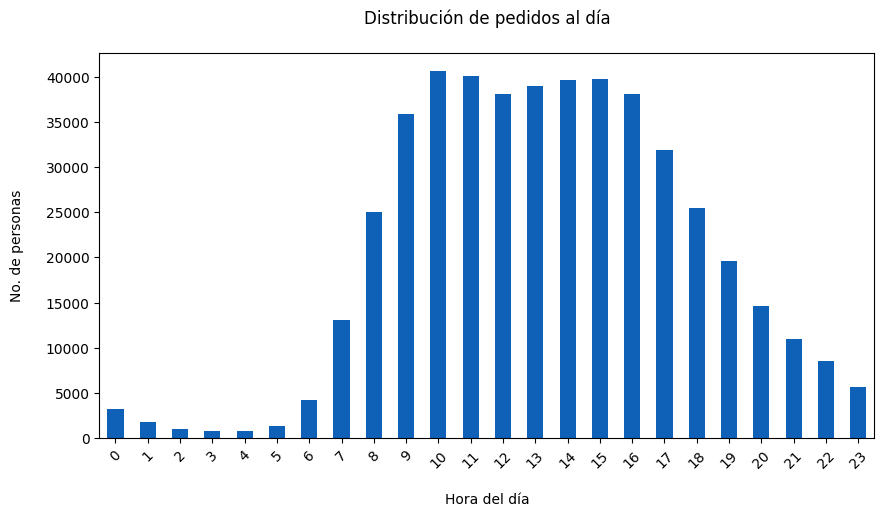

In [149]:
# Número de personas que hacen pedidos dependiendo de la hora del día.
## Agrupar el número de usuarios por hora del pedido
users_by_hour = insta_orders.groupby(by="order_hour_of_day")["user_id"].count()

## Graficar 
users_by_hour.plot(kind="bar", color="#0f61b8",
                    title="Distribución de pedidos al día\n",
        xlabel= "\nHora del día", ylabel= "No. de personas\n", 
        figsize=(10, 5), rot=45)
plt.show()

En la gráfica podemos observar la cantidad de pedidos que se realizan a la aplicación durante cada hora dle día. Algunos patrones a destacar incluyen: 

- Como era de esperarse los pedidos en la madrugada son bajos. 
- A partir de las 6 de la mañana empiezan los pedidos a la aplicación, aumentando de manera constante hasta las 10 de la mañana. 
- Existen dos modas en la cantidad de pedidos, una por la mañana y otra por la tarde, siendo los picos las 10 y las 3 de la tarde. 
- A partir de las 4 de la tarde comienza una disminución en el número de personas que hacen pedidos. 

A partir de lo anterior, podemos sugerir que los usuarios tienden a realizar sus pedidos principalmente en dos momentos del día: durante la mañana y a primera hora de la tarde.

#### [A3] ¿Qué día de la semana compran víveres las personas?

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: user_id, dtype: int64


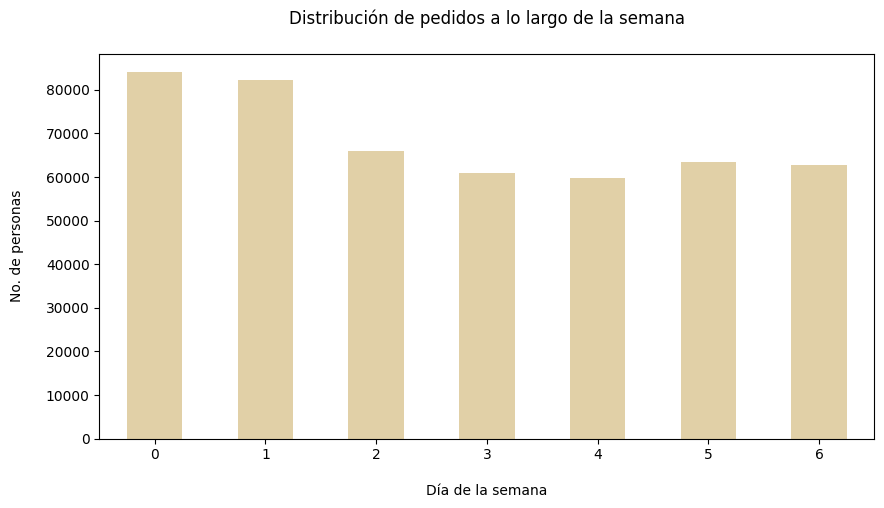

In [150]:
# Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
## Agrupar el número de usuarios por día
users_by_day = insta_orders.groupby(by="order_dow")["user_id"].count()
print(users_by_day)
## Graficar
users_by_day.plot(kind="bar", color="#e1d0a7",
                    title="Distribución de pedidos a lo largo de la semana\n",
        xlabel= "\nDía de la semana", ylabel= "No. de personas\n", 
        figsize=(10, 5), rot=0)
plt.show()


En la gráfica podemos observar la cantidad de pedidos que se realizan a la aplicación a lo largo de la semana. Algunos patrones a destacar incluyen: 

- Los pedidos se realizan a principios de semana y disminuyen a lo largo de la semana. 
- El Domingo es el día con mayor número de pedidos y estos disminuyen el día jueves, que es el punto más bajo. 
- El viernes parece retomarse la actividad en las compras. 

A partir de lo anterior, podemos sugerir que los usuarios tienden a realizar sus pedidos al inicio de la semana, posiblemente para preparase para los siguientes días. El viernes tiene un comportamiento particular, es posible que el repunte sea debido a una compra orientada para el fin de semana, sería interesante ver este efectro en otros registros. 

#### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

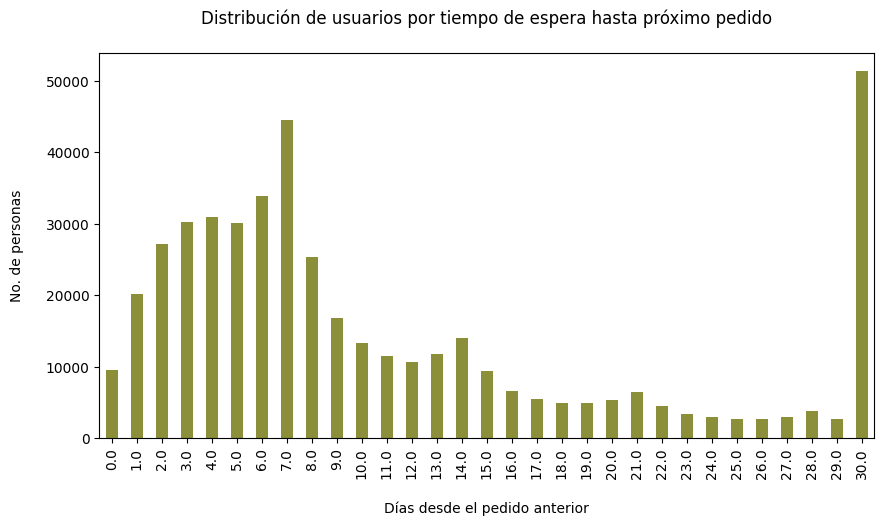

In [151]:
# Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido
## Agrupar el número de usuarios por tiempo hasta el siguiente pedido
users_by_order_wait = insta_orders.groupby(by="days_since_prior_order")["user_id"].count()

## Graficar
users_by_order_wait.plot(kind="bar", color="#8b8f3a", 
        title="Distribución de usuarios por tiempo de espera hasta próximo pedido\n",
        xlabel= "\nDías desde el pedido anterior", ylabel= "No. de personas\n", 
        figsize=(10, 5))
plt.show()

In [152]:
## Resumen estadístico días desde el pedido anterior
insta_orders["days_since_prior_order"].describe()

count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64

En la gráfica podemos observar la cantidad días transcurridos desde el último pedido. Algunos patrones a destacar incluyen: 

- La frecuencia en que la mayoría de los pedidos ocurre en los días 7 y 30 después del último pedido. 
- Existe una mayor frecuencia de pedir un artículo nuevamente en los primeros días, posteriormente a los 14 días, y después hasta los 21 días. Es decir a pesar de que la tendencia disminuye, existen picos notorios en estos días. 

Estos resultados nos sugieren que los clientes tienden a realizar sus pedidos de manera semanal, pero también lo hacen cada 7 días hasta el final del mes, donde volvemos a ver un aumento en el número de compras. 

### [B] Intermedio
1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

#### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

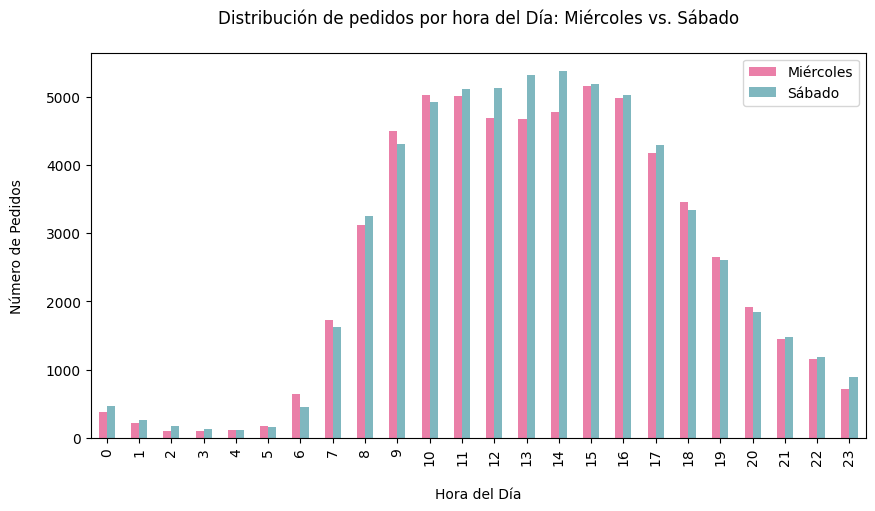

In [153]:
# Diferencias hora del pedido entre miercoles y sabado
## Filtramos y agrupamos a los usuarios de acuerdo a la hora del pedido
### Día miércoles
miercoles_df= insta_orders[insta_orders["order_days"]== "miercoles"].groupby(by="order_hour_of_day")["user_id"].count()

### Día sábado
sabado_df= insta_orders[insta_orders["order_days"]== "sabado"].groupby(by="order_hour_of_day")["user_id"].count()

## Juntamos los df
days_concat = pd.concat([miercoles_df, sabado_df], axis= "columns") 
days_concat.columns=["Miércoles", "Sábado"]

## Gráfico
days_concat.plot(kind="bar", color=["#d70053", "#007080"], alpha=0.5,
            title="Distribución de pedidos por hora del Día: Miércoles vs. Sábado\n", 
            xlabel= "\nHora del Día", ylabel="Número de Pedidos\n", 
            figsize=(10, 5))
plt.show()


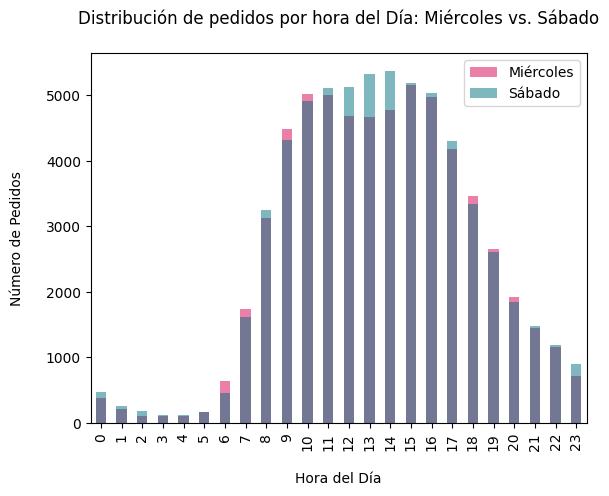

<Figure size 1000x500 with 0 Axes>

In [154]:
## Creación del gráfico sobrepuesto
miercoles_df.plot(kind="bar", color="#d70053", alpha=0.5)
sabado_df.plot(kind="bar", color="#007080", alpha= 0.5)
plt.title("Distribución de pedidos por hora del Día: Miércoles vs. Sábado\n")
plt.xlabel("\nHora del Día")
plt.ylabel("Número de Pedidos\n")
plt.legend(["Miércoles", "Sábado"])
plt.figure(figsize=(10, 5))
plt.show()

De acuerdo con resultados anteriores, los días miércoles y sábados no existe una gran cantidad de compras y no difieren en el número de ordenes. Aunque no es muy claro, el análisis revela que los miércoles y sábados presentan patrone de compras distintos. Los miércoles indican dos momentos de alta actividad en el día: uno en la mañana (10:00) y el otro en la tarde (15:00), similar a lo observado con anterioridad. Por su parte, los sábados las compras siguen una distribución más uniforme a lo largo del día, con un mayor volumen de compras entre las 10:00 y 16:00 horas. El rango de máxima actividad se encuentra entre las 13:00 y 14:00 horas. 

#### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

<Axes: title={'center': 'Distribución del número de pedidos\n'}, xlabel='\nNo. de pedidos', ylabel='No. de personas\n'>

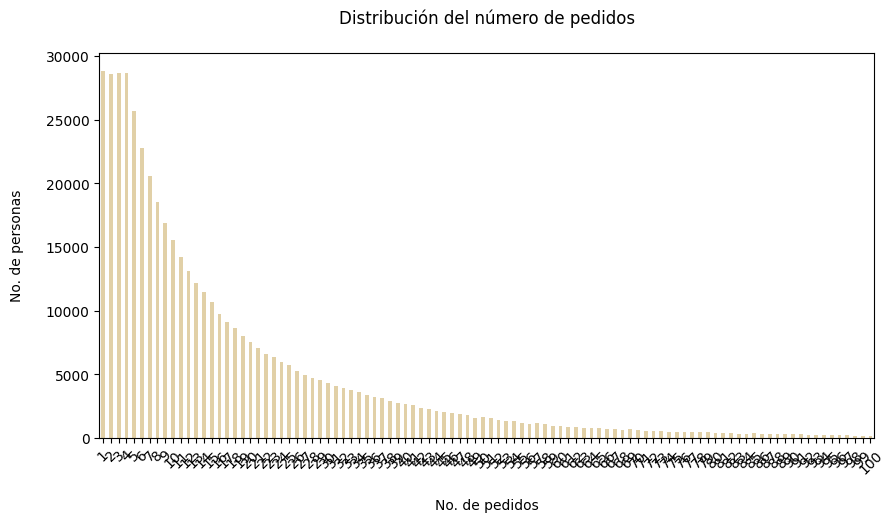

In [155]:
# 2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
## Agrupar y contar el número de orden por usuario
user_by_order_num = insta_orders.groupby(by="order_number")["user_id"].count()

## Graficar
user_by_order_num.plot(kind="bar", color="#e1d0a7",
                title="Distribución del número de pedidos\n",
                xlabel= "\nNo. de pedidos", ylabel= "No. de personas\n", 
                rot=45,figsize=(10, 5))

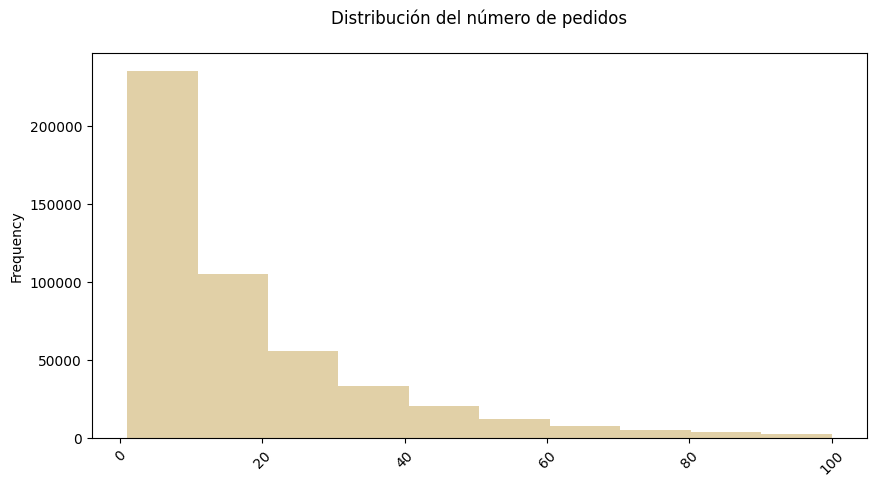

In [156]:
## Corroborar la distribución con un histograma
insta_orders["order_number"].plot(kind="hist", color="#e1d0a7", 
                            title="Distribución del número de pedidos\n",
                            rot=45,figsize=(10, 5))
plt.show()

Los gráficos muestran que la distribución del número de pedidos presenta un sesgo positivo. La mayoría de los usuarios realizan entre 1 y 4 compras, con una disminución en la frecuencia a medida que el número de compras aumenta. De manera interesante notamos grupos pequeños de clientes que realizan hasta 100 compras. Estos resultados sugieren que la gran mayoría de los clientes de la aplicación son frecuentes con compras moderadas, pero también tenemos clientes que posiblemente sean emprendedores debido al alto volumen de compra. 

#### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [157]:
## Creamos un data frame con la información del id de producto y el nombre del producto 
product_info = order_products.merge(products, on= "product_id")

In [158]:
## Agrupamos y contamos el número de productos
top20_products = product_info.groupby(["product_name", "product_id"])["product_id"].count().sort_values(ascending= False).head(20)
print(top20_products)

product_name              product_id
BANANA                    24852         66050
BAG OF ORGANIC BANANAS    13176         53297
ORGANIC STRAWBERRIES      21137         37039
ORGANIC BABY SPINACH      21903         33971
ORGANIC HASS AVOCADO      47209         29773
ORGANIC AVOCADO           47766         24689
LARGE LEMON               47626         21495
STRAWBERRIES              16797         20018
LIMES                     26209         19690
ORGANIC WHOLE MILK        27845         19600
ORGANIC RASPBERRIES       27966         19197
ORGANIC YELLOW ONION      22935         15898
ORGANIC GARLIC            24964         15292
ORGANIC ZUCCHINI          45007         14584
ORGANIC BLUEBERRIES       39275         13879
CUCUMBER KIRBY            49683         13675
ORGANIC FUJI APPLE        28204         12544
ORGANIC LEMON             5876          12232
APPLE HONEYCRISP ORGANIC  8277          11993
ORGANIC GRAPE TOMATOES    40706         11781
Name: product_id, dtype: int64


In [159]:
# Comprobación 
top20_products_v2 = product_info[["product_name","product_id"]].value_counts()
top20_products_v2.head(20)

product_name              product_id
BANANA                    24852         66050
BAG OF ORGANIC BANANAS    13176         53297
ORGANIC STRAWBERRIES      21137         37039
ORGANIC BABY SPINACH      21903         33971
ORGANIC HASS AVOCADO      47209         29773
ORGANIC AVOCADO           47766         24689
LARGE LEMON               47626         21495
STRAWBERRIES              16797         20018
LIMES                     26209         19690
ORGANIC WHOLE MILK        27845         19600
ORGANIC RASPBERRIES       27966         19197
ORGANIC YELLOW ONION      22935         15898
ORGANIC GARLIC            24964         15292
ORGANIC ZUCCHINI          45007         14584
ORGANIC BLUEBERRIES       39275         13879
CUCUMBER KIRBY            49683         13675
ORGANIC FUJI APPLE        28204         12544
ORGANIC LEMON             5876          12232
APPLE HONEYCRISP ORGANIC  8277          11993
ORGANIC GRAPE TOMATOES    40706         11781
Name: count, dtype: int64

De acuerdo con los resultados, podemos inferir que los clientes tienen una preferencia productos orgánicos y frescos, al ser los productos que se compran de manera más habitual. Los plátanos ya sea orgánicos o no son las frutas que más se consumen, seguido de las fresas orgánicas. Además de las frutas, otros productos que destacan son las espinacas, los aguacates y la leche orgánica. Este análisis sugiere que, los clientes que utilizan la aplicación tienen un interés en cosnumir productos saludables y orgánicos. 

### [C] Difícil

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

#### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64



<Axes: title={'center': 'Distribución del número de artículos por pedido\n'}, xlabel='\nNo. de artículos', ylabel='Frecuencia\n'>

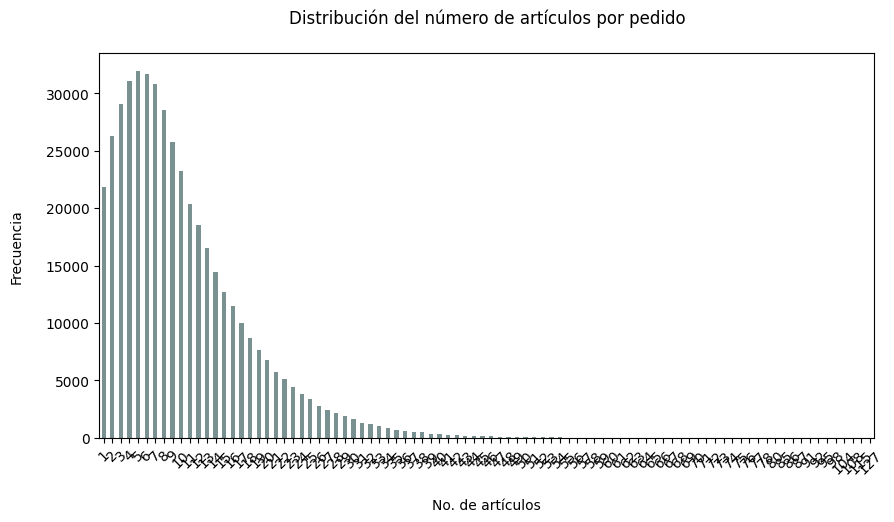

In [160]:
# Agrupamos el número de pedidos por cliente
## Agrupar el número de elementos por cliente
products_by_order = order_products.groupby(by= "order_id").size().sort_values(ascending=False)

## Descriptivos del número de elementos por cliente
print(products_by_order.describe())
print()

## Determinamos la frecuancias de pedidos
products_by_order_freq= products_by_order.value_counts().sort_index()

## Graficamos
products_by_order_freq.plot(x= products_by_order_freq.index, y= products_by_order_freq.values, 
                kind="bar", color="#7a9192",
                title= "Distribución del número de artículos por pedido\n", 
                xlabel="\nNo. de artículos", ylabel="Frecuencia\n", 
                rot=45,figsize=(10, 5))

<Axes: ylabel='Frequency'>

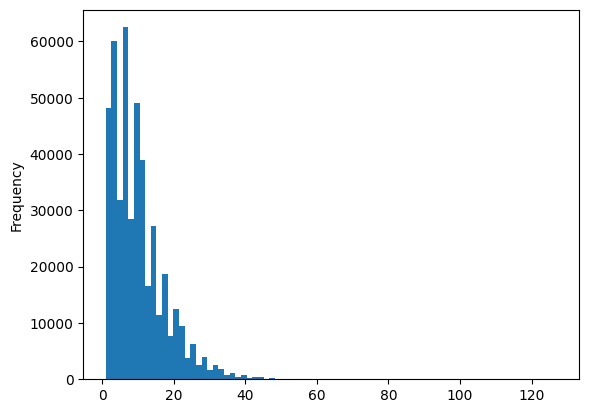

In [161]:
# Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?
order_products.groupby("order_id")["product_id"].count().plot(kind="hist", bins=80)

De acuerdo con el análisis, podemos decir que la mayoría de los clientes de la plataforma tienden a realizar pedidos pequeños, comprando entre 5 y 14 artículos, siendo el promedio 10 artículos. No obstante, existe una gran variedad en los tamaños de los pedidos, ya que algunos clientes realizan pedidos con un mayor volumen, llegando hasta un máximo de 127 artículos.  

#### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [162]:
## Filtramos los productos que se han vuelto a ordenar 
popular_product = product_info[product_info["reordered_wd"]== "Si"]

## Agrupamos y contamos el número de productos
top20_popular_products = popular_product.groupby(["product_name", "product_id"])["reordered"].count().sort_values(ascending= False).head(20)
print(top20_popular_products)

product_name              product_id
BANANA                    24852         55763
BAG OF ORGANIC BANANAS    13176         44450
ORGANIC STRAWBERRIES      21137         28639
ORGANIC BABY SPINACH      21903         26233
ORGANIC HASS AVOCADO      47209         23629
ORGANIC AVOCADO           47766         18743
ORGANIC WHOLE MILK        27845         16251
LARGE LEMON               47626         15044
ORGANIC RASPBERRIES       27966         14748
STRAWBERRIES              16797         13945
LIMES                     26209         13327
ORGANIC YELLOW ONION      22935         11145
ORGANIC GARLIC            24964         10411
ORGANIC ZUCCHINI          45007         10076
CUCUMBER KIRBY            49683          9538
ORGANIC FUJI APPLE        28204          8989
APPLE HONEYCRISP ORGANIC  8277           8836
ORGANIC BLUEBERRIES       39275          8799
ORGANIC LEMON             5876           8412
ORGANIC HALF & HALF       49235          8389
Name: reordered, dtype: int64


Similar a los resultados previos, notamos que una gran parte de los productos en el top 20 son orgánicos, incluyendo muchas frutas y verduras frescas. Además, podemos observar que en su mayoría los productos más populares son artículos básicos que son necesarios de manera regular. 

#### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?
Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?

In [194]:
## Calcular los resumenes total de reordenes y de pedidos totales
summary_order_products= product_info.groupby(["product_id", "product_name"]).agg(
    total_reorders = ("reordered", "sum"),
    total_products = ("order_id", "count"))

## Calcular la tasa de productos repetidos
summary_order_products["rate_reordered"] = summary_order_products["total_reorders"]/summary_order_products["total_products"]

print(summary_order_products["rate_reordered"].sample(15))

product_id  product_name                                           
39287       BANANA COCONUT FRUIT LEATHER                               0.333333
5812        NATURAL CALM MAGNESIUM SUPPLEMENT                          0.216216
101         BREAD- HEALTHY WHOLE GRAIN                                 0.800000
37369       RANCH LIL' CRUNCHIES SAVORY                                0.375000
4328        BACON & PEPPERONI PIZZA ROLLS                              0.250000
13838       NATURAL FREE & CLEAR DISH LIQUID                           0.483025
37171       SPECIAL K CHOCOLATEY CARAMEL PASTRY CRISPS                 0.500000
537         KOSHER DILL BABIES                                         0.444444
1197        PLATES- ULTRA- 10-1/16 INCH                                0.510870
20493       ALL NATURAL CHOCOLATE HEMP                                 0.526316
15269       NATURAL MEDIUM CHEDDAR CHEESE                              0.567775
22208       SAAG PANEER                             

In [196]:
# Segmentar el número de productos de acuerdo a su proporción de reorden

## Función para clasificación de acuerdo a la proporción de reorden
def reordered_segmentation(rate_reordered):

    ## Descripción de la función
    """
    La función devuelve la segmentación de los productos/clientes con base en la proporción en la que se pide:
    —'alta'   rate_reordered  >= 0.75
    —'moderada'  para 0.25 <= rate_reordered < 0.75
    —'baja'  para rate_reordered < 0.25
    """

    ## Bucle de la función
    if rate_reordered >= 0.75:
        return 'alta'
    elif rate_reordered >= 0.25:
        return 'moderada'
    elif rate_reordered < 0.25:
        return 'baja'

## Etiquetado del producto de acuerdo con su proporción de orden
summary_order_products["segmentation_proportion"]= summary_order_products["rate_reordered"].apply(reordered_segmentation)

## Conteo de total de productos de acuerdo con su etiquetado
print(summary_order_products["segmentation_proportion"].value_counts().sort_values(ascending=False))

segmentation_proportion
moderada    28072
baja        13808
alta         3693
Name: count, dtype: int64


Observamos que existe una gran variedad de productos con tasas de repetición similares y no observamos ningún patrón en particular. Por esta razón, decidimos clasificar los productos según la proporción en la que son comprados nuevamente. Establecimos tres categorías: productos con alta repetición (tasa de repetición mayor o igual a 0.75), productos con repetición moderada (tasa de repetición entre 0.25 y 0.75), y productos con baja repetición (tasa de repetición menor a 0.25).

Al realizar esta clasificación, notamos que la mayoría de los productos presentan una repetición moderada (28,072), seguidos por productos con baja repetición (13,808), y finalmente, un menor número de productos con alta repetición (2,804). A partir de esta segmentación, podríamos aplicar filtros adicionales para identificar los productos con las tasas de repetición más altas y continuar con análisis más detallados.

#### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [206]:
user_info= order_products.merge(insta_orders, on="order_id")

,order_id,product_id,add_to_cart_order,reordered,reordered_wd,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_days
0,2141543,11440,17,0,No,58454,25,0,15,8.0,domingo
1,567889,1560,1,1,Si,129474,16,1,13,14.0,lunes
2,2261212,26683,1,1,Si,47476,5,6,9,13.0,sabado
3,491251,8670,35,1,Si,134505,27,6,13,9.0,sabado
4,2571142,1940,5,1,Si,155995,22,5,13,5.0,viernes
...,...,...,...,...,...,...,...,...,...,...,...
4545002,577211,15290,12,1,Si,76414,30,2,15,13.0,martes
4545003,1219554,21914,9,0,No,163902,19,1,1,3.0,lunes
4545004,692640,47766,4,1,Si,597,3,0,20,30.0,domingo
4545005,319435,691,8,1,Si,7124,6,5,14,24.0,viernes


In [207]:
## Calcular los resumenes total de reordenes y de pedidos totales
summary_user_products= user_info.groupby("user_id").agg(
    total_reorders = ("reordered", "sum"),
    total_products = ("product_id", "count"))

## Calcular la tasa de productos repetidos
summary_user_products["rate_reordered"] = summary_user_products["total_reorders"]/summary_user_products["total_products"]

print(summary_user_products.round(2).sort_values(by="rate_reordered",ascending=False))

         total_reorders  total_products  rate_reordered
user_id                                                
22                    6               6             1.0
18952                 3               3             1.0
18977                 3               3             1.0
196365                1               1             1.0
136025                1               1             1.0
...                 ...             ...             ...
206175                0               7             0.0
206167                0               8             0.0
206153                0               6             0.0
177312                0               7             0.0
153492                0               6             0.0

[149626 rows x 3 columns]


In [209]:
# Segmentar el número de clientes de acuerdo a su proporción de reorden
## Etiquetado del cliente de acuerdo con su proporción de orden
summary_user_products["segmentation_proportion"]= summary_user_products["rate_reordered"].apply(reordered_segmentation)

## Conteo de total de clientes de acuerdo con su etiquetado
print(summary_user_products["segmentation_proportion"].value_counts().sort_values(ascending=False))


segmentation_proportion
moderada    82119
alta        34089
baja        33418
Name: count, dtype: int64


Al calcular la tasa de repetición de los productos previamente comprados por cada usuario y aplicar la función `reordered_segmentation`, observamos que la mayoría de los clientes (82119) presentan una tasa de repetición moderada. Es decir, aunque estos clientes suelen reordenar productos, no lo hacen de manera constante. Por otro lado, identificamos 34089 clientes con una alta tasa de repetición (100%), lo que sugiere patrones de compra muy definidos y consistentes. Finalmente, encontramos que 33418 clientes tienen una baja tasa de repetición, lo que podría indicar que son nuevos clientes, están explorando nuevos productos, o no han desarrollado hábitos de compra definidos.

#### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [210]:
product_info[product_info["add_to_cart_order"]==1].groupby("product_name")["product_name"].count().sort_values(ascending=False).head(20)

product_name
BANANA                         15562
BAG OF ORGANIC BANANAS         11026
ORGANIC WHOLE MILK              4363
ORGANIC STRAWBERRIES            3946
ORGANIC HASS AVOCADO            3390
ORGANIC BABY SPINACH            3336
ORGANIC AVOCADO                 3044
SPRING WATER                    2336
STRAWBERRIES                    2308
ORGANIC RASPBERRIES             2024
SPARKLING WATER GRAPEFRUIT      1914
ORGANIC HALF & HALF             1797
LARGE LEMON                     1737
SODA                            1733
ORGANIC REDUCED FAT MILK        1397
LIMES                           1370
HASS AVOCADOS                   1340
ORGANIC REDUCED FAT 2% MILK     1310
HALF & HALF                     1309
RASPBERRIES                     1246
Name: product_name, dtype: int64

El análisis revela que al momento de comprar, los clientes deciden agregar productos frescos y orgánicos en su lista de compras. Existe una alta frecuencia en artículos como frutas, verduras y leche orgánicas. Además, de manera intrigante notamos que entre los artículos se encuentran las sodas. 

## Conclusion general del proyecto
---

A lo largo del análisis, hemos obtenido una visión general de los patrones de compra que tienen los clientes de la aplicación. Algunas de los resultados clave son:

1. **Patrones de compra distintos por día de la semana**. Observamos que durante la semana, existen dos picos principales de actividad, mientras que los fines de semana existe un patrón más uniforme. 
2. **Compras tempranas**. La mayoría de clientes prefieren realizar sus comprar sus productos inicios de semana y a inicios del mes. Esta tendencia disminuye a lo largo de la semana y del mes. 
3. **Tipos de clientes**. La maayoría de clientes son recurrentes y minoristas. Sin embargo, existen otros clientes con grandes volumenes de compra, que representan un segmento interesante para estrategias de marketing específicas. 
4. **Preferencia de consumo**. Los clientes tienden por comprar productos frescos y orgánicos, mostrando una consistencia y preferencia por estos artículos. 

Con estos datos, podríamos generar y/u optimizar estrategias de marketing y mejora en la gestión de los inventarios. Además, podemos crear una segmentación de clientes y productos, encaminadasa a mejorar la personalización en la manera en que los clientes comoprarn en la aplicación, es decir promociones, específicas, puntos de lealtad o captación de clientes potenciales.  

aisles["aisle_id"]=aisles["aisle_id"].astype("int")

3. Exploración inicial de los datos
4. Análisis descriptivo
5. Visualización de datos